In [7]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(iris.data, iris.target)

iris.data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

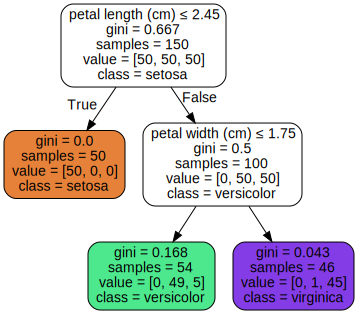

In [8]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True,special_characters=True)

graph = graphviz.Source(dot_data) 
graph

In [12]:
import matplotlib.pyplot as plt
#help(tree.export_graphviz)
iris.feature_names


list

In [14]:
print(len(iris.target_names))
print(type(iris.target_names))
print(iris.target_names)
print('#####################################')
print(len(iris.feature_names))
print(type(iris.feature_names))
print(iris.feature_names)


3
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
#####################################
4
<class 'list'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [1]:
import pandas as pd

# read the second worksheet of aan excel
xls = pd.ExcelFile('C:/Users/guoxi/PycharmProjects/MachineLearning/datasets/fitness.xlsx')
sessionData = pd.read_excel(xls, 'SessionData')[['SessionType','MemberMobilePhone']]

sessionData.head()

,SessionType,MemberMobilePhone
0,Yoga,89764556
1,KickBoxing,83366359
2,Yoga,96866003
3,KickBoxing,89137581
4,Yoga,91457597


In [2]:
memberData = pd.read_excel(xls,'MemberData')[['MemberMobilePhone','FitnessPointsDec18']]
memberData.head()

,MemberMobilePhone,FitnessPointsDec18
0,95542303,NaN
1,85757439,52.0
2,96653095,30.0
3,95631182,24.0
4,94331391,45.0


In [3]:
# merge tow forms,缺失值用0来填充
sessionDataYoga = sessionData[sessionData['SessionType']=='Yoga'].groupby(['MemberMobilePhone','SessionType']).size().to_frame('Yoga').reset_index()
sessionDataKickBoxing = sessionData[sessionData['SessionType']=='KickBoxing'].groupby(['MemberMobilePhone','SessionType']).size().to_frame('KickBoxing').reset_index()
sessionDataGroup = sessionDataYoga.merge(sessionDataKickBoxing,left_on='MemberMobilePhone',right_on='MemberMobilePhone',how='left')[['MemberMobilePhone','Yoga','KickBoxing']]
sessionDataResult = sessionDataGroup.merge(memberData,left_on='MemberMobilePhone',right_on='MemberMobilePhone',how='left').fillna(0)
sessionDataResult[sessionDataResult['FitnessPointsDec18']!=0].head(10)

,MemberMobilePhone,Yoga,KickBoxing,FitnessPointsDec18
0,81032218,7,3.0,50.0
1,81043204,4,5.0,35.0
5,81324120,9,3.0,66.0
6,81328647,3,3.0,24.0
8,81637320,9,0.0,57.0
9,81857120,7,0.0,41.0
10,81977596,8,5.0,64.0
11,82010383,8,3.0,58.0
14,82124515,3,3.0,24.0
15,82245006,8,2.0,55.0


In [4]:
from sklearn.linear_model import LinearRegression
# 0.9866126968157355
# 0.987444945182135 剔除KickBoxing为0的数据。否则会导致欠拟合。而且如果有为0的数据，最后检验出来会变成KickBoxing成负相关
result = sessionDataResult[sessionDataResult['FitnessPointsDec18']!=0]
res = result[result['KickBoxing']!=0]
lr = LinearRegression()
X = res[['Yoga','KickBoxing']]
y = res[['FitnessPointsDec18']]
lr.fit(X,y)
lr.score(X,y)

0.987444945182135

In [83]:
sessionDataResult[sessionDataResult['FitnessPointsDec18']==0].head()

,MemberMobilePhone,Yoga,KickBoxing,FitnessPointsDec18
2,81248130,8,3.0,0.0
3,81249410,6,3.0,0.0
4,81251893,6,2.0,0.0
7,81478223,9,2.0,0.0
12,82012584,4,2.0,0.0


In [5]:
import numpy as np
X_predict = sessionDataResult[sessionDataResult['FitnessPointsDec18']==0][['Yoga','KickBoxing']]
y_predict = lr.predict(X)
np.round(y_predict,decimals=2)

array([[50.9 ],
       [35.86],
       [65.48],
       [21.74],
       [65.02],
       [58.19],
       [21.74],
       [54.78],
       [42.69],
       [52.46],
       [54.78],
       [56.8 ],
       [49.51],
       [40.2 ],
       [72.31],
       [47.49],
       [54.78],
       [76.18],
       [54.78],
       [72.77],
       [65.02],
       [25.62],
       [73.23],
       [32.91],
       [32.45],
       [50.9 ],
       [83.94],
       [83.47],
       [18.33],
       [80.06],
       [25.62],
       [51.36],
       [21.28],
       [25.16],
       [21.74],
       [25.62],
       [49.51],
       [46.1 ],
       [21.74],
       [40.2 ],
       [32.91],
       [36.32],
       [68.89],
       [53.39],
       [10.58],
       [54.32],
       [32.91],
       [29.49],
       [72.77],
       [39.74],
       [32.91],
       [35.86],
       [47.49],
       [36.32],
       [38.81],
       [46.1 ],
       [40.2 ],
       [65.48],
       [35.86],
       [54.78],
       [14.45],
       [57.73],
       [

In [6]:
sessionDataResult[sessionDataResult['KickBoxing']==0].head()

,MemberMobilePhone,Yoga,KickBoxing,FitnessPointsDec18
8,81637320,9,0.0,57.0
9,81857120,7,0.0,41.0
23,83192382,4,0.0,20.0
32,83584303,6,0.0,33.0
38,84336165,4,0.0,20.0


In [7]:
# 列和列之间的相关性[-1,1],(-1,0)表示负相关，0表示不相关，(0,1)表示正相关，可用于降维。
# 默认是皮尔逊相关系数
sessionDataResult[sessionDataResult['KickBoxing']!=0].iloc[:,1:4].corr()


,Yoga,KickBoxing,FitnessPointsDec18
Yoga,1.000000,-0.281488,0.363419
KickBoxing,-0.281488,1.000000,0.046811
FitnessPointsDec18,0.363419,0.046811,1.000000


In [8]:
result = sessionDataResult[sessionDataResult['FitnessPointsDec18']!=0]
result[result['KickBoxing']!=0].head()

,MemberMobilePhone,Yoga,KickBoxing,FitnessPointsDec18
0,81032218,7,3.0,50.0
1,81043204,4,5.0,35.0
5,81324120,9,3.0,66.0
6,81328647,3,3.0,24.0
10,81977596,8,5.0,64.0


In [86]:
# 相当于两个变量所占的权重值
lr.coef_

array([[7.28989191, 3.4134804 ]])

In [12]:
res

,Yoga,KickBoxing,FitnessPointsDec18
count,102.000000,102.000000,102.000000
mean,6.078431,3.647059,46.392157
std,2.531725,2.258743,17.978621
min,1.000000,1.000000,17.000000
25%,4.000000,2.000000,31.000000
50%,5.000000,3.000000,44.000000
75%,8.000000,5.000000,59.500000
max,12.000000,12.000000,87.000000
